In [285]:
# 옵션 설정
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 필요한 패키지
import re
import requests
import numpy as np
import pandas as pd

import folium
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
from folium.features import DivIcon

In [274]:
city_data_df = pd.read_csv("src/city_data_df.csv")

In [277]:
def obj_to_float(x):
    numbers = re.findall(r'\d+\.\d+', x)
    result = [[float(numbers[i]), float(numbers[i+1])] for i in range(0, len(numbers), 2)]
    return result

city_data_df['CENTER'] = city_data_df['CENTER'].apply(lambda x: obj_to_float(x)[0])
city_data_df['COORDINATES'] = city_data_df['COORDINATES'].apply(obj_to_float)

In [278]:
city_data_df.head(3)

,CATEGORY,AREA_CD,AREA_NM,HASHTAG,CENTER,COORDINATES
0,관광특구,POI001,강남 MICE 관광특구,강남,"[37.51095136635107, 127.06016778945924]","[[37.513903342198184, 127.06027547260382], [37..."
1,관광특구,POI002,동대문 관광특구,동대문,"[37.567269671705716, 127.0113515853882]","[[37.56949795219521, 127.01759028830955], [37...."
2,관광특구,POI003,명동 관광특구,명동,"[37.564650367842184, 126.98208332061769]","[[37.56066567164939, 126.97600605147264], [37...."


In [316]:
m = folium.Map(location=[37.53, 127.06], zoom_start=12)
minimap = MiniMap() 
m.add_child(minimap)

folium.Marker([37.50,127.05]).add_to(m)
folium.Marker([37.55,127.06]).add_to(m);

In [483]:
m = folium.Map(location=[37.53, 127.06], zoom_start=12)
which = folium.map.FeatureGroup()

for AREA_NM, (x,y), COORDINATES in city_data_df[["AREA_NM", "CENTER", "COORDINATES"]].values:
    folium.Polygon(
        locations=COORDINATES,
        fill=True,
        tooltip=AREA_NM,
        ).add_to(m)
    
    which.add_child(
        folium.map.Marker(
            location=[x, y],
            icon=DivIcon(
                icon_size=(100, 100),
                icon_anchor=(0, 0),
                html='<div style="font-size: 10pt; color:black;"><b>%s</b></div>'
                % AREA_NM,
            ),
        )
    )
which.add_to(m);

In [389]:
m = folium.Map(location=[37.53, 127.06], zoom_start=12)
which = folium.map.FeatureGroup()

for AREA_NM, (x, y) in city_data_df[["AREA_NM", "CENTER"]].values:
    which.add_child(
        folium.features.CircleMarker(
            location=[x, y],
            tooltip=AREA_NM,
            radius=8,
            color="red",
            fill=True,
            fill_color="blue",
        )
    )

    which.add_child(
        folium.map.Marker(
            location=[x, y],
            icon=DivIcon(
                icon_size=(100, 100),
                icon_anchor=(0, 0),
                html='<div style="font-size: 10; color:blue;"><b>%s</b></div>'
                % AREA_NM,
            ),
        )
    )
which.add_to(m);

In [404]:
m = folium.Map(location=[37.53, 127.06], zoom_start=12)

for AREA_NM, (x, y) in city_data_df[["AREA_NM", "CENTER"]].values:
    folium.Marker(
        location=[x, y],
        tooltip=AREA_NM,
        icon=folium.Icon(
            icon="flag",
            color="red",
        ),
    ).add_to(m)

In [402]:
m = folium.Map(location=[37.53, 127.06], zoom_start=12)
mc = MarkerCluster()

for AREA_NM, (x, y) in city_data_df[["AREA_NM", "CENTER"]].values:
    mc.add_child(
        folium.Marker(
            location=[x, y], tooltip=AREA_NM, icon=folium.Icon(icon="flag", color="red")
        )
    )
mc.add_to(m);

In [442]:
m

# 서울 도시데이터 API 사용

In [438]:
base_url = "http://openapi.seoul.go.kr:8088"
api_key = "544259516c626f673332707066656a"
data_format = "json"

city_code = city_data_df["AREA_CD"][0]

url = "/".join([base_url, api_key, data_format, "citydata/1/5", city_code])

In [439]:
response = requests.get(url)
data = response.json()

In [517]:
CITYDATA = data['CITYDATA']
LIVE_PPLTN_STTS = CITYDATA['LIVE_PPLTN_STTS'][0]

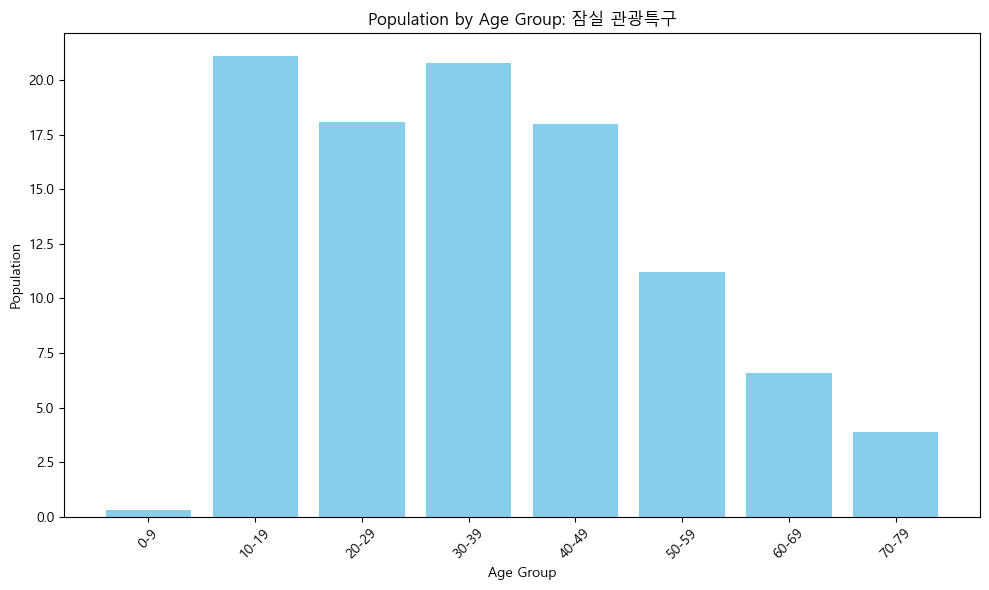

In [620]:
import matplotlib.pyplot as plt

# 나이대별 데이터
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
counts = [float(LIVE_PPLTN_STTS[f"PPLTN_RATE_{_}"]) for _ in range(0,80,10)]  # 각 나이대별 인구 수

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(age_groups, counts, color='skyblue')

# 그래프 제목과 축 레이블 설정
plt.title('Population by Age Group: ' + CITYDATA['AREA_NM'])
plt.xlabel('Age Group')
plt.ylabel('Population')

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [559]:
CITYDATA_df = pd.DataFrame(columns=["AREA_NM","AREA_CD","AREA_CONGEST_LVL","PPLTN_TIME"])
CITYDATA_df.loc[len(CITYDATA_df)] = [CITYDATA['AREA_NM'], CITYDATA['AREA_CD'], LIVE_PPLTN_STTS['AREA_CONGEST_LVL'], LIVE_PPLTN_STTS['PPLTN_TIME'],   ]

In [560]:
CITYDATA_df = pd.DataFrame(columns=["AREA_NM","AREA_CD","AREA_CONGEST_LVL","PPLTN_TIME"])

for i in range(5):
    city_code = city_data_df["AREA_CD"][i]
    url = "/".join([base_url, api_key, data_format, "citydata/1/5", city_code])
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        CITYDATA = data['CITYDATA']
        LIVE_PPLTN_STTS = CITYDATA['LIVE_PPLTN_STTS'][0]
        CITYDATA_df.loc[len(CITYDATA_df)] = [CITYDATA['AREA_NM'], CITYDATA['AREA_CD'], LIVE_PPLTN_STTS['AREA_CONGEST_LVL'], LIVE_PPLTN_STTS['PPLTN_TIME'],   ]

In [562]:
# 5개 40초

In [564]:
CITYDATA_df.to_csv("src/city_congest.csv", index=False)

In [591]:
city_congest_df = pd.merge(CITYDATA_df, city_data_df, how="inner")
city_congest_df

,AREA_NM,AREA_CD,AREA_CONGEST_LVL,PPLTN_TIME,CATEGORY,HASHTAG,CENTER,COORDINATES
0,강남 MICE 관광특구,POI001,붐빔,2024-05-03 11:50,관광특구,강남,"[37.51095136635107, 127.06016778945924]","[[37.513903342198184, 127.06027547260382], [37..."
1,동대문 관광특구,POI002,약간 붐빔,2024-05-03 11:50,관광특구,동대문,"[37.567269671705716, 127.0113515853882]","[[37.56949795219521, 127.01759028830955], [37...."
2,명동 관광특구,POI003,약간 붐빔,2024-05-03 11:50,관광특구,명동,"[37.564650367842184, 126.98208332061769]","[[37.56066567164939, 126.97600605147264], [37...."
3,이태원 관광특구,POI004,보통,2024-05-03 11:50,관광특구,이태원,"[37.534419660369636, 126.99628829956056]","[[37.53030452088333, 126.99124563997569], [37...."
4,잠실 관광특구,POI005,약간 붐빔,2024-05-03 11:50,관광특구,잠실,"[37.51619365602682, 127.11130142211915]","[[37.51051251319657, 127.0930735179394], [37.5..."


In [597]:
m = folium.Map(location=[37.53, 127.06], zoom_start=12)
mc = MarkerCluster()

for AREA_NM, (x, y), CONGEST in city_congest_df[["AREA_NM", "CENTER", "AREA_CONGEST_LVL"]].values:
    mc.add_child(
        folium.Marker(
            popup = CONGEST,
            location=[x, y], tooltip=AREA_NM, icon=folium.Icon(icon="flag", color="red")
        )
    )
mc.add_to(m);

In [598]:
m